/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6


In [52]:
# Review Lecture 2
%run global_variables.py 

a = 2
b = 3
x = tf.add(a, b)
y = tf.multiply(a, b)
z = tf.pow(y, x)

sess = tf.Session()
writer = tf.summary.FileWriter("./graphs", sess.graph)
print(sess.run(z))

sess.close()

def mserror(Y, Y_predict):
    return np.square(Y - Y_predict)


7776


## Linear regression

1.71838 15.7892
25.3752686437


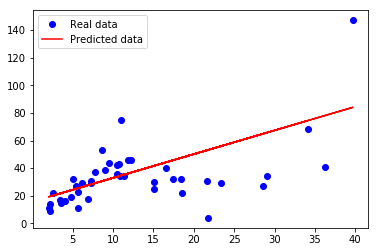

In [61]:
"""
Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./my_graph/03/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(100): # train the model 100 times
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
# 		print 'Epoch {0}: {1}'.format(i, total_loss/n_samples)
	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_value, b_value = sess.run([w, b]) 

print(w_value, b_value)
a = mserror(y, x* w_value + b_value)
print(a)
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

In [59]:
# Keras equivalence

%matplotlib inline
import tensorflow
import keras
from keras.models import Model, Input
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import backend as K
import xlrd
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

X = data[:,0].reshape((-1,1))
Y = data[:,1].reshape((-1,1))

n_samples = sheet.nrows - 1

def custom_loss(y_true, y_pred):
    return K.square(y_true - y_pred)

def huber_loss(y_true, y_pred, delta=1.0):
    residual = K.abs(y_pred - y_true)[0,0]
    condition = K.less(residual, delta)
    small_res = 0.5 * K.square(residual)
    large_res = delta * residual - 0.5 * K.square(delta)
    return K.switch(condition, small_res, large_res)

x = Input(shape=(1,), dtype='float32')
y_predict = Dense(1) (x)

model1 = Model(inputs=x, outputs=y_predict)

model1.compile(SGD(0.0001), loss=custom_loss)

model1.fit(X, Y, epochs=100, verbose=0)

w_1, b_1 = model1.layers[1].get_weights()
print(w_1, b_1, mserror(Y, X * w_1[0] + b_1))

model2 = Model(inputs=x, outputs=y_predict)

model2.compile(SGD(0.0001), loss=huber_loss)

model2.fit(X, Y, epochs=100, verbose=0)

w_2, b_2 = model2.layers[1].get_weights()
print(w_2, b_2, mserror(Y, X * w_2[0] + b_2))

plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_1[0] + b_1, 'r', label='Predicted data mean loss')
plt.plot(X, X * w_2[0] + b_2, 'g', label='Predicted data huber loss')
plt.legend()
plt.show()

ValueError: Fetch argument <tf.Operation 'init_3' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "init_3"
op: "NoOp"
input: "^dense_7/kernel/Assign"
input: "^dense_7/bias/Assign"
input: "^iterations_4/Assign"
input: "^lr_4/Assign"
input: "^momentum_4/Assign"
input: "^decay_4/Assign"
input: "^Variable_6/Assign"
input: "^Variable_7/Assign"
 is not an element of this graph.)

In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
